In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc


import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/somit/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv("/media/somit/Local DIsk/BTP/Data Sources/deg-p-13.3/Bacillus Subtilis 168/pre.csv")
# dataset = pd.read_csv("/home/somit/Desktop/BTP/deg-p-13.3/TyphiLT2/data.csv")
feature=['CAI','CBI','Fop','GC','Essentiality','GC3s','L_sym','L_aa','Gravy','Aromo']
# add=['#Function']
homo=['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','H11','H12','H13','H14','H15']
network=['BC','CC','CCO','DC','Stress','NC']
# network=['NF1','NF2']
features=feature
features+=homo
# features+=add
features+=network
print features
df=dataset[features]
#df['Nc'] = pd.to_numeric(df['Nc'],errors='coerce')
df['GC']=df['GC'].fillna(0)
df['GC3s']=df['GC3s'].fillna(0)
df['L_sym']=df['L_sym'].fillna(0)
df['L_aa']=df['L_aa'].fillna(0)
df['Gravy']=df['Gravy'].fillna(0)
df['Aromo']=df['Aromo'].fillna(0)
df=df[df.GC!=0]
df=df[df.DC!=0]
# le = preprocessing.LabelEncoder()
# df['#Function']=le.fit_transform(df['#Function'])
df = df.sample(frac=1).reset_index(drop=False)
df.info()
df.head(5)
features.remove('Essentiality')
print features
X_train=df[features]
Y_train=df['Essentiality']
print X_train.head()

['CAI', 'CBI', 'Fop', 'GC', 'Essentiality', 'GC3s', 'L_sym', 'L_aa', 'Gravy', 'Aromo', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'BC', 'CC', 'CCO', 'DC', 'Stress', 'NC']


/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3681 entries, 0 to 3680
Data columns (total 32 columns):
index           3681 non-null int64
CAI             3681 non-null float64
CBI             3681 non-null float64
Fop             3681 non-null float64
GC              3681 non-null float64
Essentiality    3681 non-null int64
GC3s            3681 non-null float64
L_sym           3681 non-null float64
L_aa            3681 non-null float64
Gravy           3681 non-null float64
Aromo           3681 non-null float64
H1              3681 non-null int64
H2              3681 non-null int64
H3              3681 non-null int64
H4              3681 non-null int64
H5              3681 non-null int64
H6              3681 non-null int64
H7              3681 non-null int64
H8              3681 non-null int64
H9              3681 non-null int64
H10             3681 non-null int64
H11             3681 non-null int64
H12             3681 non-null int64
H13             3681 non-null int64
H14        

/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(df, test_size = 0.2,random_state=23)
# print features
# X_train=train[features]
# X_train=X_train.reset_index(drop=True)
# Y_train=train['Essentiality']
# Y_train=Y_train.reset_index(drop=True)
# X_test=test[features]
# X_test=X_test.reset_index(drop=True)
# Y_test=test['Essentiality']
# Y_test=Y_test.reset_index(drop=True)
# print X_train.head(5)
# print Y_train.head(5)
# # print Y_train.shape
# # print Y_test.shape
# # X_train=df[features]
# # Y_train=df['Essentiality']

In [4]:
# X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")].index.values].hist(figsize=[20,20])

In [5]:
# from sklearn.preprocessing import MinMaxScaler
# min_max=MinMaxScaler()
# X_train=min_max.fit_transform(X_train)
# X_test=min_max.fit_transform(X_test)
# # X_train=X_train_feature
# # print X_train[:,1]

In [6]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
# X_test = scaler.transform(X_test)
# print X_train[0:5]

Time Taken = 3.429266


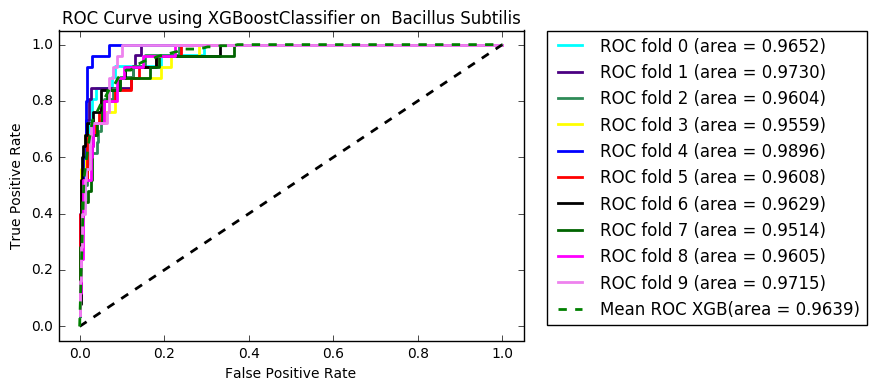

147 MB


In [7]:
from sklearn import cross_validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from scipy import interp
from itertools import cycle
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import timeit


# pca = PCA()
# X_train=pca.fit_transform(X_train)

# print len(X_train)
# print Y_train.shape

#kf_total =cross_validation.KFold(len(X_train), n_folds=10,shuffle=True, random_state=4)
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=23)
#kf=KFold(n_splits=10,shuffle=True,random_state=23)
skf.get_n_splits(X_train,Y_train)

# clf = MLPClassifier()
# clf=SVC(C=1,probability=True)

# clf=RandomForestClassifier()
# clf=DecisionTreeClassifier()
# clf=KNeighborsClassifier(n_neighbors = 25)
# clf=GaussianNB()

clf=XGBClassifier()

mean_tpr_xgb = 0.0
mean_fpr_xgb = np.linspace(0,1,100)


colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue','red','black','darkgreen','magenta','violet'])
lw = 2

i = 0
start = timeit.default_timer()
for (train, test), color in zip(skf.split(X_train,Y_train), colors):
    probas_ = clf.fit(X_train[train],Y_train[train]).predict_proba(X_train[test])      
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y_train[test], probas_[:,1])
    mean_tpr_xgb += interp(mean_fpr_xgb, fpr, tpr)
    mean_tpr_xgb[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,label='ROC fold %d (area = %0.4f)' % (i, roc_auc))
    i += 1
stop = timeit.default_timer()  
print "Time Taken = %f" %(stop-start)
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k')

mean_tpr_xgb /= skf.get_n_splits(X_train,Y_train)
mean_tpr_xgb[-1] = 1.0
mean_auc_xgb = auc(mean_fpr_xgb, mean_tpr_xgb)
plt.plot(mean_fpr_xgb, mean_tpr_xgb, color='g', linestyle='--',label='Mean ROC XGB(area = %0.4f)' % mean_auc_xgb, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using XGBoostClassifier on  Bacillus Subtilis')
# plt.legend(loc="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

import resource
print str(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024) + " MB"

(3681, 30)
(3681, 30)
(3681,)
Time Taken =0.190157 


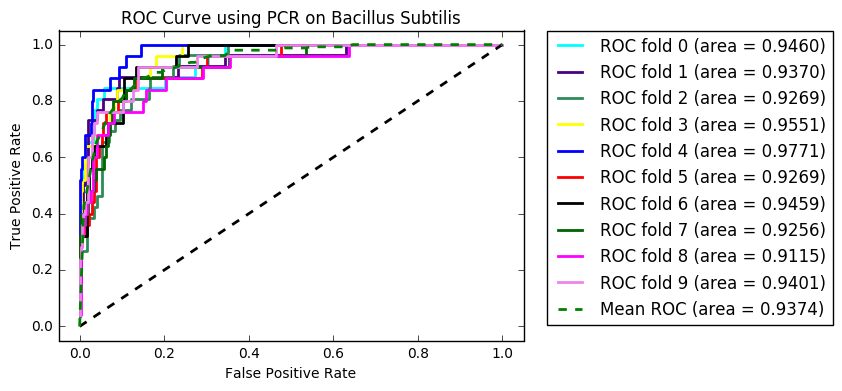

214 MB


In [43]:
from sklearn import cross_validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from scipy import interp
from itertools import cycle
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import timeit

pca = PCA()
xtrain=X_train
print xtrain.shape
ytrain=Y_train
xtrain=pca.fit_transform(xtrain)
print xtrain.shape
print ytrain.shape
#print ytrain
clf =LinearRegression()

# clf.fit(X_train,Y_train)
# pred=clf.predict(X_test)
# print pred[0:5]


# print len(X_train)
# print Y_train.shape

#kf_total =cross_validation.KFold(len(X_train), n_folds=10,shuffle=True, random_state=4)
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=23)
#kf=KFold(n_splits=10,shuffle=True,random_state=23)
skf.get_n_splits(xtrain,ytrain)

mean_tpr_pcr = 0.0
mean_fpr_pcr = np.linspace(0,1,100)


colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue','red','black','darkgreen','magenta','violet'])
lw = 2

i = 0

start= timeit.default_timer()

for (train, test), color in zip(skf.split(xtrain,ytrain), colors):
    probas_ = clf.fit(xtrain[train],ytrain[train]).predict(xtrain[test])
            
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(ytrain[test], probas_)
    mean_tpr_pcr += interp(mean_fpr_pcr, fpr, tpr)
    mean_tpr_pcr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,label='ROC fold %d (area = %0.4f)' % (i, roc_auc))
    i += 1
    
stop = timeit.default_timer()
print "Time Taken =%f " %(stop-start)

plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k')

mean_tpr_pcr /= skf.get_n_splits(xtrain,ytrain)
mean_tpr_pcr[-1] = 1.0
mean_auc_pcr = auc(mean_fpr_pcr, mean_tpr_pcr)
plt.plot(mean_fpr_pcr, mean_tpr_pcr, color='g', linestyle='--',label='Mean ROC (area = %0.4f)' % mean_auc_pcr, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using PCR on Bacillus Subtilis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

import resource
print str(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024) + " MB"

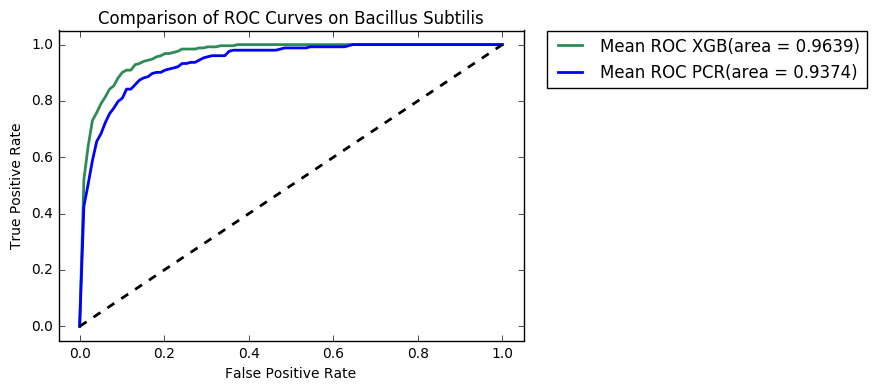

In [9]:
plt.plot(mean_fpr_xgb, mean_tpr_xgb, color='seagreen',label='Mean ROC XGB(area = %0.4f)' % mean_auc_xgb, lw=lw)
plt.plot(mean_fpr_pcr, mean_tpr_pcr, color='blue',label='Mean ROC PCR(area = %0.4f)' % mean_auc_pcr, lw=lw)
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='black')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves on Bacillus Subtilis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [10]:
data = pd.read_csv("/media/somit/Local DIsk/BTP/Data Sources/deg-p-13.3/TyphiLT2/data.csv")
# data= pd.read_csv("/home/somit/Desktop/BTP/deg-p-13.3/Bacillus Subtilis 168/pre.csv")
features=['CAI','CBI','Fop','GC','Essentiality','GC3s','L_sym','L_aa','Gravy','Aromo']
# add=['#Function']
homo=['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','H11','H12','H13','H14','H15']
network=['BC','CC','CCO','DC','Stress','NC']
features+=homo
# features+=add
features+=network
print features
df1=data[features]
# df1.info()
# df1['GC'] = pd.to_numeric(df['GC'],errors='coerce')
df1['GC']=df1['GC'].fillna(0)
df1['GC3s']=df1['GC3s'].fillna(0)
df1['L_sym']=df1['L_sym'].fillna(0)
df1['L_aa']=df1['L_aa'].fillna(0)
df1['Gravy']=df1['Gravy'].fillna(0)
df1['Aromo']=df1['Aromo'].fillna(0)
df1=df1[df1.GC!=0]
df1=df1[df1.DC!=0]
# le = preprocessing.LabelEncoder()
# df1['#Function']=le.fit_transform(df1['#Function'])
df1=df1.sample(frac=1).reset_index(drop=False)
df1.info()
print df1.sample(5)
features.remove('Essentiality')
test_data=df1[features]
test_label=df1['Essentiality']


['CAI', 'CBI', 'Fop', 'GC', 'Essentiality', 'GC3s', 'L_sym', 'L_aa', 'Gravy', 'Aromo', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'BC', 'CC', 'CCO', 'DC', 'Stress', 'NC']


/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336 entries, 0 to 4335
Data columns (total 32 columns):
index           4336 non-null int64
CAI             4336 non-null float64
CBI             4336 non-null float64
Fop             4336 non-null float64
GC              4336 non-null float64
Essentiality    4336 non-null int64
GC3s            4336 non-null float64
L_sym           4336 non-null float64
L_aa            4336 non-null float64
Gravy           4336 non-null float64
Aromo           4336 non-null float64
H1              4336 non-null int64
H2              4336 non-null int64
H3              4336 non-null int64
H4              4336 non-null int64
H5              4336 non-null int64
H6              4336 non-null int64
H7              4336 non-null int64
H8              4336 non-null int64
H9              4336 non-null int64
H10             4336 non-null int64
H11             4336 non-null int64
H12             4336 non-null int64
H13             4336 non-null int64
H14        

In [11]:
# from sklearn.preprocessing import MinMaxScaler
# min_max=MinMaxScaler()
# df1=min_max.fit_transform(df1)


In [12]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(test_data)

# Scale the test set
test_data = scaler.transform(test_data)
# print df1[:1]


[[  9.98828948e-01   1.17105641e-03]
 [  9.99461651e-01   5.38359047e-04]
 [  9.79746580e-01   2.02533994e-02]
 [  9.86874938e-01   1.31250378e-02]
 [  9.45756972e-01   5.42430505e-02]]
Time Taken = 0.297930


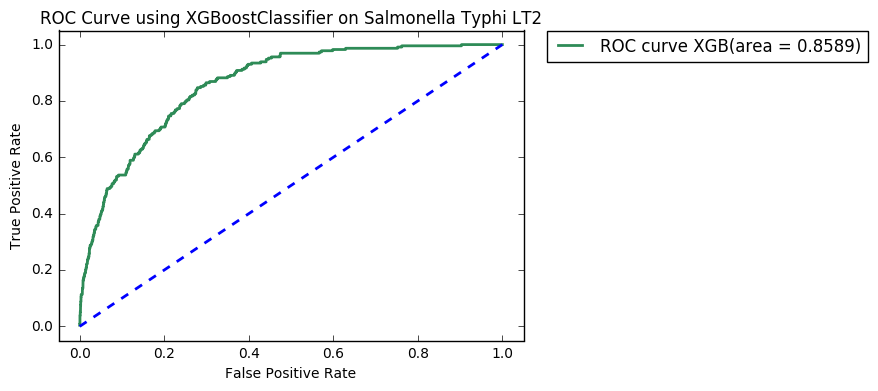

In [18]:
clf=XGBClassifier()

lw = 2
start=timeit.default_timer()
#Compute ROC curve and area the curve
clf.fit(X_train,Y_train)
probas_=clf.predict_proba(test_data)
print probas_[0:5]
stop = timeit.default_timer()
print "Time Taken = %f"%(stop-start)
fpr_xgb, tpr_xgb, thresholds = roc_curve(test_label, probas_[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, lw=lw, color='seagreen',label='ROC curve XGB(area = %0.4f)' % (roc_auc_xgb))
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='blue')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using XGBoostClassifier on Salmonella Typhi LT2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



/home/somit/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/somit/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


[ 0.23731468  0.11523213  0.37774115  0.30997256  0.28048952]
Time Taken =0.009920


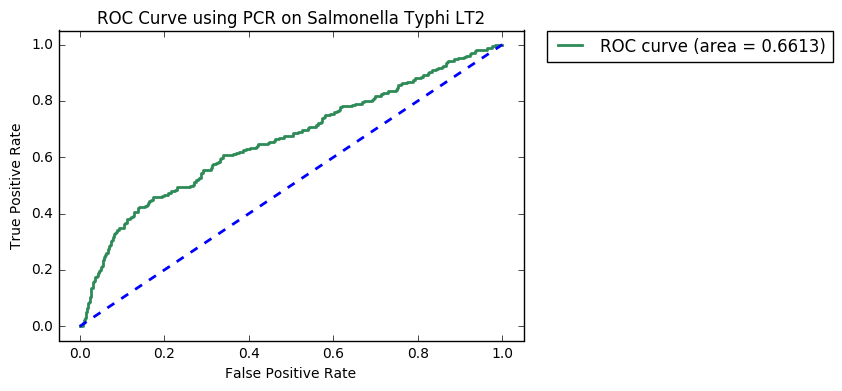

214 MB


In [33]:
# clf=XGBClassifier()
# clf=RandomForestClassifier()
# clf=DecisionTreeClassifier()
# clf=KNeighborsClassifier(n_neighbors = 25)
# clf=GaussianNB()
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

pca = PCA()
test_data_pcr=pca.fit_transform(test_data)
clf=LinearRegression()
#clf=linear_model.LogisticRegression()

# mean_tpr = 0.0
# mean_fpr = np.linspace(0,1,100)


# colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue','red','black','darkgreen','magenta','violet'])

lw = 2
start = timeit.default_timer()
#Compute ROC curve and area the curve
clf.fit(xtrain,ytrain)
probas_=clf.predict(test_data_pcr)
# print probas_[0:5]

scaler = MinMaxScaler(feature_range=(0,1))
probas_=scaler.fit_transform(probas_)
print probas_[:5]

stop = timeit.default_timer()
print "Time Taken =%f"%(stop-start)
fpr_pcr, tpr_pcr, thresholds = roc_curve(test_label, probas_)
roc_auc_pcr = auc(fpr_pcr, tpr_pcr)
plt.plot(fpr_pcr, tpr_pcr, lw=lw, color='seagreen',label='ROC curve (area = %0.4f)' % (roc_auc_pcr))
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='blue')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using PCR on Salmonella Typhi LT2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

import resource
print str(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024) + " MB"



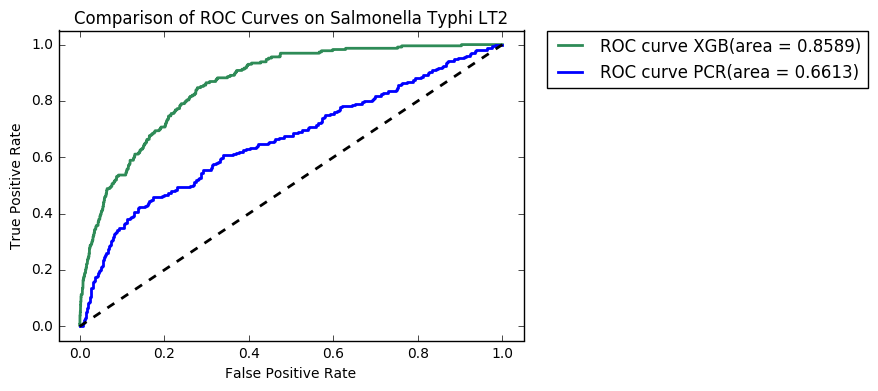

In [34]:
plt.plot(fpr_xgb, tpr_xgb, lw=lw, color='seagreen',label='ROC curve XGB(area = %0.4f)' % (roc_auc_xgb))
plt.plot(fpr_pcr, tpr_pcr, lw=lw, color='blue',label='ROC curve PCR(area = %0.4f)' % (roc_auc_pcr))
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='black')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves on Salmonella Typhi LT2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [60]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
r_train=mutual_info_classif(X_train,Y_train,discrete_features='auto', copy=True, random_state=None)
r_test=mutual_info_classif(test_data,test_label,discrete_features='auto',copy=True, random_state=None)
#print features
#print r_train.shape
r_train=r_train.reshape(1,30)
r_test=r_test.reshape(1,30)
#print r
df_train=pd.DataFrame(r_train,columns=features)
df_test=pd.DataFrame(r_test,columns=features)
# print df_train
# print df_test
sorted_df1=df_train.iloc[0].sort_values(ascending=False)
sorted_df2=df_test.iloc[0].sort_values(ascending=False)
print sorted_df1
#df_train.sort(ascending=False).plot(y="df_train.columns",kind="bar")
print "\n"
print sorted_df2



H7        0.059284
H8        0.058758
H9        0.054544
CAI       0.049302
L_aa      0.049142
NC        0.048933
H5        0.047962
DC        0.047405
Fop       0.042460
H15       0.042102
L_sym     0.040712
CC        0.038594
H12       0.035582
H11       0.035114
H6        0.033911
H13       0.033370
CCO       0.032973
H10       0.032959
H4        0.032764
H2        0.032482
CBI       0.031913
H1        0.031907
Aromo     0.031073
H3        0.029523
H14       0.026510
Gravy     0.026502
GC        0.019929
GC3s      0.014608
Stress    0.013827
BC        0.000726
Name: 0, dtype: float64


AttributeError: 'DataFrame' object has no attribute 'sort'

In [46]:
# clf=XGBClassifier(max_delta_step=1,max_depth=5,min_child_weight=0.5,gamma=1e-5)
# clf.fit(X_train, Y_train)
# X_test=test_data
# Y_test=test_label
# Y_pred=clf.predict_proba(X_test)
# pred=clf.predict(X_test)
# # print Y_pred
# # print Y_test
# score=clf.score(X_train,Y_train)
# print score*100
# # Y_test=Y_test.reshape(835,1)
# # pred=pred.reshape(835,1)
# accuracy = accuracy_score(Y_test,pred)
# print accuracy * 100
# i=0
# count1=0
# count0=0
# count00=0
# for i in range(len(Y_test)):
#     if pred[i]==1 and Y_test[i]==1:
#         count1+=1
#     if pred[i]==0 and Y_test[i]==0:
#         count00+=1
        
# print "True Positives" ,count1        
# i=0
# count=0
# for i in range(len(Y_test)):
#     if Y_test[i]==1:
#         count+=1
#     else:
#         count0+=1
# print "Total positives",count
# print "True Negatives",count00
# print "Total negatives" ,count0

# # Compute ROC curve and ROC area for each class
# fpr, tpr,_ = roc_curve(Y_test,Y_pred[:,1])
# roc_auc = auc(fpr,tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.4f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()

In [47]:
# from sklearn import cross_validation
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import KFold
# from scipy import interp
# from itertools import cycle
# from sklearn.neural_network import MLPClassifier
# from sklearn.decomposition import PCA
# import timeit


# # pca = PCA()
# # X_train=pca.fit_transform(X_train)

# # print len(X_train)
# # print Y_train.shape

# #kf_total =cross_validation.KFold(len(X_train), n_folds=10,shuffle=True, random_state=4)
# skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=23)
# #kf=KFold(n_splits=10,shuffle=True,random_state=23)
# skf.get_n_splits(X_train,Y_train)

# # clf = MLPClassifier()
# clf=SVC(probability=True)
# #clf=XGBClassifier()
# # clf=RandomForestClassifier()
# # clf=DecisionTreeClassifier()
# # clf=KNeighborsClassifier(n_neighbors = 25)
# # clf=GaussianNB()

# mean_tpr = 0.0
# mean_fpr = np.linspace(0,1,100)


# colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue','red','black','darkgreen','magenta','violet'])
# lw = 2

# i = 0
# start = timeit.default_timer()


# for (train, test), color in zip(skf.split(X_train,Y_train), colors):
#     probas_ = clf.fit(X_train[train],Y_train[train]).predict_proba(X_train[test])      
#     # Compute ROC curve and area the curve
#     fpr, tpr, thresholds = roc_curve(Y_train[test], probas_[:,1])
#     mean_tpr += interp(mean_fpr, fpr, tpr)
#     mean_tpr[0] = 0.0
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, lw=lw, color=color,label='ROC fold %d (area = %0.4f)' % (i, roc_auc))
#     i += 1
    

# stop = timeit.default_timer()  
# print "Time Taken = %f" %(stop-start)
# plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k')

# mean_tpr /= skf.get_n_splits(X_train,Y_train)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',label='Mean ROC (area = %0.4f)' % mean_auc, lw=lw)

# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic using SVM for Bacillus')
# # plt.legend(loc="right")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()
# # for train,test in skf.split(X_train,Y_train):
# #     x_train, x_test = X_train.iloc[train], X_train.iloc[test]
# #     y_train, y_test = Y_train.iloc[train], Y_train.iloc[test]

    

In [48]:
# clf=SVC(probability=True)
# clf.fit(X_train,Y_train)
# Y_pred=clf.predict_proba(X_test)
# #print Y_score
# # acc_svc = clf.score(X_train, Y_train) * 100
# # print acc_svc
# # acc=accuracy_score(Y_test,Y_pred)
# # print acc
# fpr, tpr,_ = roc_curve(Y_test, Y_pred[:,1])
# roc_auc = auc(fpr, tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve using SVM for TyphiLT2')
# plt.legend(loc="lower right")
# plt.show()

In [49]:
# clf=RandomForestClassifier()
# clf.fit(X_train,Y_train)
# Y_pred=clf.predict_proba(X_test)
# acc_svc = round(clf.score(X_test, Y_test) * 100, 2)
# print acc_svc
# fpr, tpr,_ = roc_curve(Y_test, Y_pred[:,1])
# roc_auc = auc(fpr, tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()

In [50]:
# knn = KNeighborsClassifier(n_neighbors = 3)
# knn.fit(X_train, Y_train)
# Y_pred = knn.predict_proba(X_test)
# # acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
# # acc_knn
# fpr, tpr,_ = roc_curve(Y_test, Y_pred[:,1])
# roc_auc = auc(fpr, tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()

In [51]:
# # Gaussian Naive Bayes

# gaussian = GaussianNB()
# gaussian.fit(X_train, Y_train)
# Y_pred = gaussian.predict_proba(X_test)
# # acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
# # acc_gaussian
# fpr, tpr,_ = roc_curve(Y_test, Y_pred[:,1])
# roc_auc = auc(fpr, tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()

In [52]:
# # Perceptron

# perceptron = Perceptron()
# perceptron.fit(X_train, Y_train)
# Y_pred = perceptron.predict(X_test)
# acc_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)
# acc_perceptron
# fpr, tpr,_ = roc_curve(Y_test, Y_pred)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()

In [53]:
# # Linear SVC

# linear_svc = LinearSVC()
# linear_svc.fit(X_train, Y_train)
# Y_pred = linear_svc.predict(X_test)
# acc_linear_svc = round(linear_svc.score(X_test, Y_test)* 100, 2)
# acc_linear_svc
# fpr, tpr,_ = roc_curve(Y_test, Y_pred)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()

In [54]:
# # Stochastic Gradient Descent

# sgd = SGDClassifier()
# sgd.fit(X_train, Y_train)
# Y_pred = sgd.predict(X_test)
# acc_sgd = round(sgd.score(X_test, Y_test) * 100, 2)
# acc_sgd
# fpr, tpr,_ = roc_curve(Y_test, Y_pred)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()

In [55]:
# # Decision Tree
# clf= DecisionTreeClassifier()
# clf.fit(X_train, Y_train)
# Y_pred = clf.predict(X_test)
# acc=accuracy_score(Y_test,Y_pred)
# print acc*100
# print Y_pred.shape
# #print Y_score.shape
# fpr, tpr,_ = roc_curve(Y_test, Y_pred)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()

In [56]:
# # roc_auc_score(Y_test,Y_score)
# # roc_auc_score
# acc_decision_tree = round(clf.score(X_test, Y_test) * 100, 2)
# acc=accuracy_score(Y_test,Y_pred)
# print acc*100
# print acc_decision_tree